In [31]:
# load our dependencies
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
# load our data into a dataframe
df = pd.read_csv('./data/covid-case-data.csv')

# visualize our data
df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/01,2020/07/19,NaN,2020/07/01,Laboratory-confirmed case,Male,30 - 39 Years,Hispanic/Latino,No,Missing,No,Missing
1,2020/10/11,2021/01/08,NaN,2020/10/11,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
2,2021/02/09,2021/02/09,2021/02/04,2021/02/10,Probable Case,Male,50 - 59 Years,Unknown,Missing,Missing,Missing,Unknown
3,2020/07/20,2020/07/20,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/06/05,2020/06/05,NaN,2020/06/05,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
999994,2020/10/23,2020/10/23,NaN,NaN,Probable Case,Male,50 - 59 Years,Unknown,Missing,Missing,Missing,Missing
999995,2021/04/02,2021/04/06,NaN,2021/04/02,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing
999996,2020/11/17,2020/11/17,NaN,NaN,Laboratory-confirmed case,Female,50 - 59 Years,Missing,Missing,Missing,Missing,Missing
999997,2020/10/23,2020/10/23,NaN,NaN,Probable Case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing


In [33]:
# let's drop fields we don't need
df.drop(columns=['current_status', 'cdc_case_earliest_dt ', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'death_yn'], axis=1, inplace=True, errors='ignore')
df.loc[(df['hosp_yn']=='Yes') | (df['icu_yn']=='Yes'), 'hosp'] = 'Yes'
df.loc[((df['hosp_yn']=='No') | (df['icu_yn']=='No')) & (df['hosp'] != 'Yes'), 'hosp'] = 'No'
df.drop(columns=['hosp_yn', 'icu_yn'], axis=1, inplace=True)
df

,sex,age_group,race_ethnicity_combined,medcond_yn,hosp
0,Male,30 - 39 Years,Hispanic/Latino,Missing,No
1,Female,10 - 19 Years,Unknown,Missing,No
2,Male,50 - 59 Years,Unknown,Unknown,NaN
3,Female,30 - 39 Years,"Black, Non-Hispanic",Missing,NaN
4,Male,0 - 9 Years,Hispanic/Latino,Missing,No
...,...,...,...,...,...
999994,Male,50 - 59 Years,Unknown,Missing,NaN
999995,Female,10 - 19 Years,"White, Non-Hispanic",Missing,No
999996,Female,50 - 59 Years,Missing,Missing,NaN
999997,Female,20 - 29 Years,"White, Non-Hispanic",Missing,NaN


In [34]:
# let's clean the data up 

for column in df:
    print(f"{column}: {df[column].unique()}")
    
    df.drop(df.loc[df[column]=='Unknown'].index, inplace=True)
    df.drop(df.loc[df[column]=='Missing'].index, inplace=True)
    df.drop(df.loc[df[column]=='Other'].index, inplace=True)
    df.dropna(inplace= True)
    print(f"{column}: {df[column].unique()}\n")

sex: ['Male' 'Female' 'Unknown' 'Missing' 'Other' nan]
sex: ['Male' 'Female']

age_group: ['30 - 39 Years' '10 - 19 Years' '0 - 9 Years' '40 - 49 Years'
 '20 - 29 Years' '50 - 59 Years' '80+ Years' '70 - 79 Years'
 '60 - 69 Years' 'Missing']
age_group: ['30 - 39 Years' '10 - 19 Years' '0 - 9 Years' '40 - 49 Years'
 '20 - 29 Years' '50 - 59 Years' '80+ Years' '70 - 79 Years'
 '60 - 69 Years']

race_ethnicity_combined: ['Hispanic/Latino' 'Unknown' 'American Indian/Alaska Native, Non-Hispanic'
 'White, Non-Hispanic' 'Black, Non-Hispanic' 'Missing'
 'Asian, Non-Hispanic' 'Multiple/Other, Non-Hispanic'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']
race_ethnicity_combined: ['Hispanic/Latino' 'American Indian/Alaska Native, Non-Hispanic'
 'White, Non-Hispanic' 'Black, Non-Hispanic' 'Asian, Non-Hispanic'
 'Multiple/Other, Non-Hispanic'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']

medcond_yn: ['Missing' 'Yes' 'Unknown' 'No']
medcond_yn: ['Yes' 'No']

hosp: ['No' 'Yes']
h

In [35]:
# map the data
df.replace({
    'Male': 1, 
    'Female': 0, 
    'Yes': 1, 
    'No': 0,
    '0 - 9 Years': 0,
    '10 - 19 Years': 1,
    '20 - 29 Years': 2,
    '30 - 39 Years': 3,
    '40 - 49 Years': 4,
    '50 - 59 Years': 5,
    '60 - 69 Years': 6,
    '70 - 79 Years': 7,
    '80+ Years': 8,
    'Hispanic/Latino': 0,
    'Black, Non-Hispanic': 1,
    'White, Non-Hispanic': 2,
    'American Indian/Alaska Native, Non-Hispanic': 3,
    'Asian, Non-Hispanic': 4,
    'Multiple/Other, Non-Hispanic': 5,
    'Native Hawaiian/Other Pacific Islander, Non-Hispanic': 6
}, inplace=True)


# let's assign our features without our target to x
x = df.drop('hosp', axis=1)

# let's assign our target to y
y = df.hosp

# make sure we have clean data values
for column in df:
    print(f"{column}: {df[column].unique()}")


sex: [1 0]
age_group: [3 1 7 4 5 2 6 8 0]
race_ethnicity_combined: [2 1 0 5 4 3 6]
medcond_yn: [1 0]
hosp: [0 1]


In [36]:
df

,sex,age_group,race_ethnicity_combined,medcond_yn,hosp
39,1,3,2,1,0
66,1,1,2,1,0
84,1,1,2,1,0
149,1,7,1,1,1
175,1,3,0,1,0
...,...,...,...,...,...
999956,1,7,2,1,1
999979,0,6,1,1,0
999983,0,0,2,0,0
999986,1,5,0,1,0


In [38]:
# setup our train/test data with the default split ratio (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

# setup our model
logistic_regression = LogisticRegression()

# train the model/fit the data
clf = logistic_regression.fit(x_train, y_train)

In [39]:
# accuracy score
clf.score(x_test, y_test) * 100

86.12346463362982

In [40]:
# test the model against our data
clf.predict_proba(x_test[0:1])

array([[0.93343133, 0.06656867]])

In [41]:
# let's save the model so we can reuse it
import pickle
with open('./models/hospitalization.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [50]:
# let's reload it
import pickle
with open('./models/hospitalization.pickle', 'rb') as f:
    clf = pickle.load(f)
type(clf)

sklearn.linear_model._logistic.LogisticRegression

In [51]:
# let's input some data and test it
prob = clf.predict_proba((np.array([1, 1, 2, 0]).reshape(1, -1)))[0]
_, hospitalization = prob

# output our probabilities
print(f'Probability of hospitalization: {hospitalization * 100}')

Probability of hospitalization: 1.124976587559419


<AxesSubplot:xlabel='medcond_yn'>

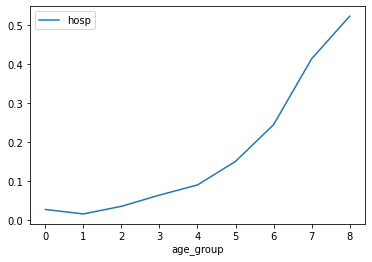

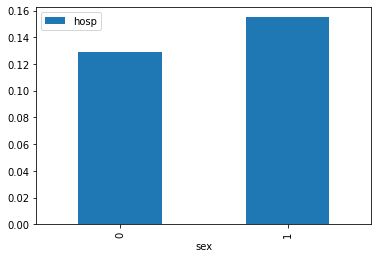

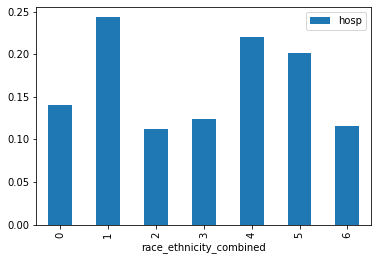

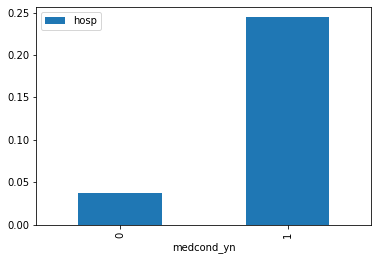

In [56]:
df_age_hosp = df[['age_group', 'hosp']]
df_age_hosp.groupby(['age_group']).mean().plot()

df_sex_hosp = df[['sex', 'hosp']]
df_sex_hosp.groupby(['sex']).mean().plot(kind="bar")

df_race_hosp = df[['race_ethnicity_combined', 'hosp']]
df_race_hosp.groupby(['race_ethnicity_combined']).mean().plot(kind="bar")

df_med_hosp = df[['medcond_yn', 'hosp']]
df_med_hosp.groupby(['medcond_yn']).mean().plot(kind="bar")

<AxesSubplot:xlabel='age_group'>

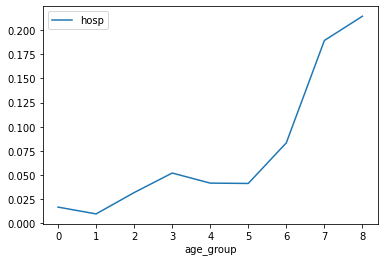

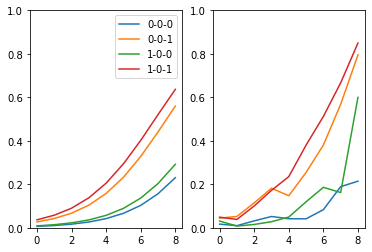

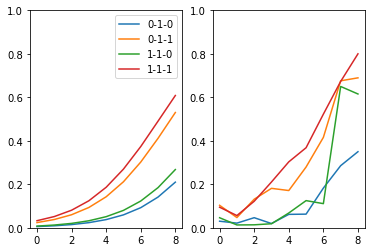

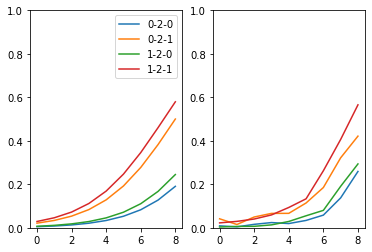

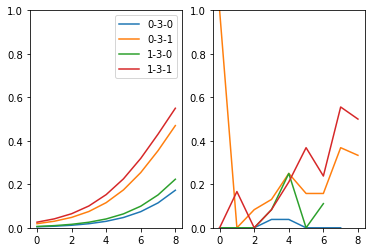

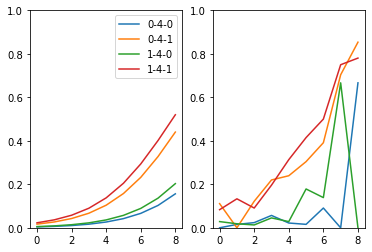

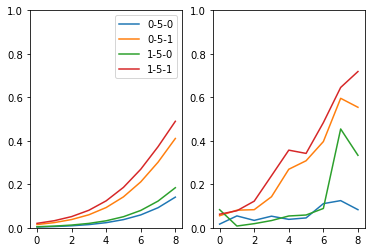

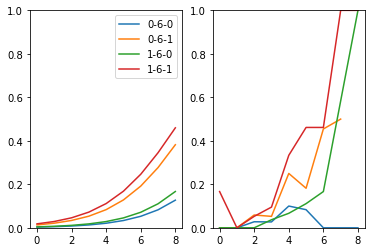

In [77]:
from matplotlib import pyplot as plt
for race in range(0,7):
    plt.figure(race)
    for sex in range(0,2):
        for med in range(0,2):
            predict_array = [[sex, i, race, med] for i in range(0,9)]
            prob_array = clf.predict_proba(predict_array)[:,1]
            plt.subplot(1,2,1)
            plt.plot([i for i in range(0,9)], prob_array, label=f'{sex}-{race}-{med}')
            plt.legend()
            plt.ylim(0, 1)

            # The actual data
            plt.subplot(1,2,2)
            selected_record = df[(df['sex']==sex) & (df['race_ethnicity_combined']==race) & (df['medcond_yn']==med)]
            df_age_hosp = selected_record[['age_group', 'hosp']]
            plt.plot(df_age_hosp.groupby(['age_group']).mean())
            plt.ylim(0, 1)